# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline



In [230]:
sinasc = pd.read_csv('b1abb33c4f.csv')
print(sinasc.shape)
print(sinasc.drop_duplicates().shape)
# Não há duplicados
sinasc.head(2)

(27028, 69)
(27028, 69)


,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [231]:
count_apgar5 = sinasc['APGAR5'].isna().sum()
print(f'Quantidade de registros APGAR5 com NaN: {count_apgar5}\n')
sinasc['APGAR5'].fillna(99, inplace=True)
count_apgar5 = sinasc['APGAR5'].isna().sum()
print(f'Quantidade de registros APGAR5 com NaN: {count_apgar5}\n')

Quantidade de registros APGAR5 com NaN: 103

Quantidade de registros APGAR5 com NaN: 0



In [232]:
#criando categoria para o APGAR5
sinasc.loc[(sinasc['APGAR5'] <= 3), 'cat_apgar5'] = '1 - asfixia grave'
sinasc.loc[(sinasc['APGAR5'] > 3 )& (sinasc['APGAR5'] <= 5), 'cat_apgar5'] = '2 - asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] > 5 )& (sinasc['APGAR5'] <= 7), 'cat_apgar5'] = '3 - asfixia leve'
sinasc.loc[(sinasc['APGAR5'] > 7 )& (sinasc['APGAR5'] <= 10), 'cat_apgar5'] = '4 - normal'
sinasc.loc[(sinasc['APGAR5'] == 99), 'cat_apgar5'] = '0 - Ignorado'

sinasc['cat_apgar5'].value_counts()

sinasc['GESTACAO'].value_counts()

37 a 41 semanas        22589
32 a 36 semanas         2249
42 semanas e mais        700
28 a 31 semanas          165
22 a 27 semanas           86
Menos de 22 semanas        7
Name: GESTACAO, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

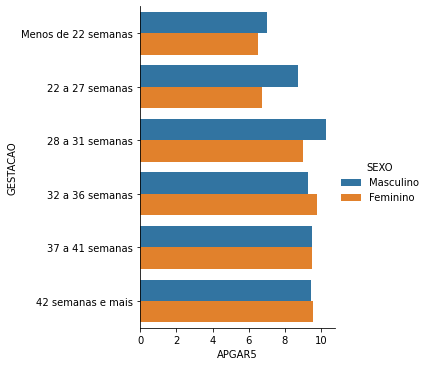

In [233]:
plt.close
ax = sns.catplot(x='APGAR5', y='GESTACAO'
            , hue = 'SEXO'
            , kind='bar'
            #, estimator = sum
            , data=sinasc
            , ci = None
            ,order= ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 41 semanas','42 semanas e mais'],
           )


####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [234]:
tab = pd.crosstab(sinasc['GESTACAO'], sinasc['cat_apgar5'])
print(tab)

cat_apgar5           0 - Ignorado  1 - asfixia grave  2 - asfixia moderada  \
GESTACAO                                                                     
22 a 27 semanas                 1                 21                     1   
28 a 31 semanas                 3                  3                    12   
32 a 36 semanas                15                  8                    19   
37 a 41 semanas                66                 33                    28   
42 semanas e mais               2                  1                     1   
Menos de 22 semanas             0                  2                     0   

cat_apgar5           3 - asfixia leve  4 - normal  
GESTACAO                                           
22 a 27 semanas                    12          51  
28 a 31 semanas                    18         129  
32 a 36 semanas                    73        2134  
37 a 41 semanas                   196       22266  
42 semanas e mais                   6         690  
Menos de 22

####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [235]:
tab_pctlin = tab.div(tab.sum(axis = 1), axis = 0 )
tab_pctlin

cat_apgar5,0 - Ignorado,1 - asfixia grave,2 - asfixia moderada,3 - asfixia leve,4 - normal
GESTACAO,,,,,
22 a 27 semanas,0.011628,0.244186,0.011628,0.139535,0.593023
28 a 31 semanas,0.018182,0.018182,0.072727,0.109091,0.781818
32 a 36 semanas,0.006670,0.003557,0.008448,0.032459,0.948866
37 a 41 semanas,0.002922,0.001461,0.001240,0.008677,0.985701
42 semanas e mais,0.002857,0.001429,0.001429,0.008571,0.985714
Menos de 22 semanas,0.000000,0.285714,0.000000,0.142857,0.571429


In [236]:
#tab_pctlin.sum(axis = 1)

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<AxesSubplot:xlabel='GESTACAO'>

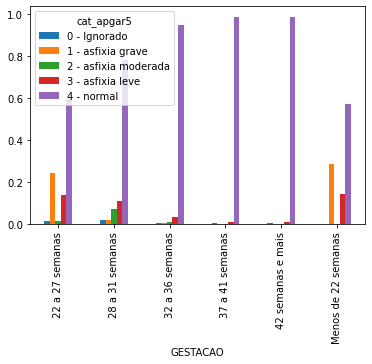

In [237]:
tab_pctlin.plot.bar()
# Acima de 37 semanas o percentual do APGAR5 passa a ser acima de 98%, corroborando para a afirmativa dos médicos.
 

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

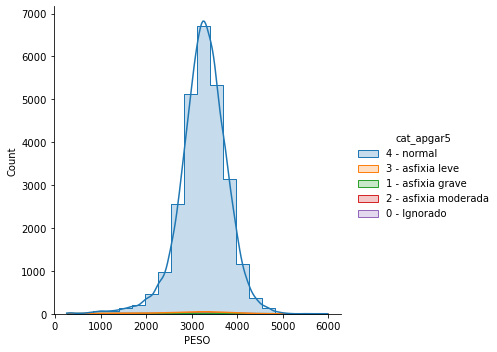

In [238]:
sns.displot(data = sinasc
            ,alpha = .25
            ,x = 'PESO'
            ,hue = 'cat_apgar5'
            ,bins = 20
            ,element = 'step'
            ,kde = True
           )

In [245]:
#criando categoria para o PESO
sinasc.loc[(sinasc['PESO'] <= 1000), 'cat_peso'] = '1 - menor 1000g'
sinasc.loc[(sinasc['PESO'] > 1000 )& (sinasc['APGAR5'] <= 2000), 'cat_peso'] = '2 - 1000g a 2000g'
sinasc.loc[(sinasc['PESO'] > 2000 )& (sinasc['APGAR5'] <= 3000), 'cat_peso'] = '3 - 2000g a 3000g'
sinasc.loc[(sinasc['PESO'] > 3000 )& (sinasc['APGAR5'] <= 4000), 'cat_peso'] = '4 - 3000g a 4000g'
sinasc.loc[(sinasc['PESO'] > 4000 )& (sinasc['APGAR5'] <= 5000), 'cat_peso'] = '5 - 4000g a 5000g'
sinasc.loc[(sinasc['PESO'] > 5000), 'cat_peso'] = '6 - mais 5000g'

sinasc['cat_peso'].value_counts()

4 - 3000g a 4000g    18004
3 - 2000g a 3000g     6783
5 - 4000g a 5000g     1535
2 - 1000g a 2000g      561
1 - menor 1000g        133
6 - mais 5000g          12
Name: cat_peso, dtype: int64

In [256]:
#criando tabela cruzada cat_peso / cat_apgar5
tab_peso = pd.crosstab(sinasc['cat_peso'], sinasc['cat_apgar5'])


In [257]:
#criando a tabela de percentual de linha
tab_pct = tab_peso.div(tab_peso.sum(axis = 1), axis = 0 )


In [259]:
#tab_pct.sum(axis = 1) #conferencia percentuais de linha

<AxesSubplot:xlabel='cat_peso'>

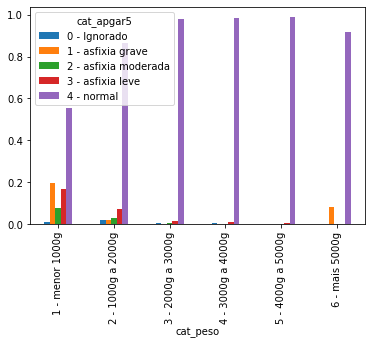

In [260]:
tab_pct.plot.bar()

<AxesSubplot:xlabel='cat_apgar5'>

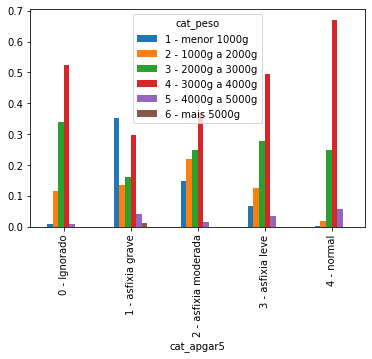

In [250]:
tab_apgar5 = pd.crosstab(sinasc['cat_apgar5'], sinasc['cat_peso']) # tabela cruzada cat_apgar5 / cat_peso
tab_pct5 = tab_apgar5.div(tab_apgar5.sum(axis = 1), axis = 0 ) #tabela de percentuais de linha 
tab_pct5.plot.bar() #Neste gráfico temos como inferir que asfixia grave e moderada acontecem com maior frequência
#                    em crianças com menos de 3000g. 

In [261]:
#criando categoria para o PESO2 com 3 faixas para visualizar melhor a inferencia acima.
sinasc.loc[(sinasc['PESO'] <= 3000), 'cat_peso2'] = '1 - menor 3000g'
sinasc.loc[(sinasc['PESO'] > 3000 )& (sinasc['APGAR5'] <= 4000), 'cat_peso2'] = '2 - 3000g a 4000g'
sinasc.loc[(sinasc['PESO'] > 4000), 'cat_peso2'] = '3 - mais 4000g'

In [262]:
tab_peso2 = pd.crosstab(sinasc['cat_apgar5'], sinasc['cat_peso2'])
tab_peso2

cat_peso2,1 - menor 3000g,2 - 3000g a 4000g,3 - mais 4000g
cat_apgar5,,,
0 - Ignorado,48,54,1
1 - asfixia grave,48,22,4
2 - asfixia moderada,42,25,1
3 - asfixia leve,151,158,11
4 - normal,7188,17745,1530


In [263]:
tab_pct2 = tab_peso2.div(tab_peso2.sum(axis = 1), axis = 0 )
tab_pct2

cat_peso2,1 - menor 3000g,2 - 3000g a 4000g,3 - mais 4000g
cat_apgar5,,,
0 - Ignorado,0.466019,0.524272,0.009709
1 - asfixia grave,0.648649,0.297297,0.054054
2 - asfixia moderada,0.617647,0.367647,0.014706
3 - asfixia leve,0.471875,0.493750,0.034375
4 - normal,0.271625,0.670559,0.057817


<AxesSubplot:xlabel='cat_apgar5'>

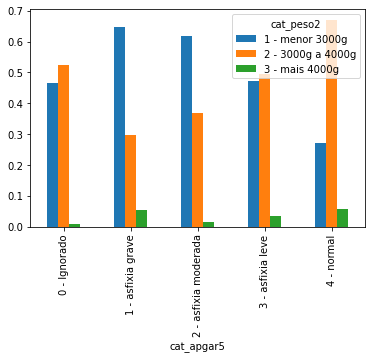

In [264]:
tab_pct2.plot.bar() # neste gráfico fica mais visual que o percentual de asfixia grave e moderada é maior no grupo
#                     de crianças com menos de 3000g. E que o percentual de apgar5 normal é maior em crianças entre 3000 e 4000g